In [ ]:
#Scipy------Scientific Python
#scientific calculation

In [5]:
import scipy.constants
from scipy import constants

In [6]:
print(constants.pi)
print(dir(constants))

3.141592653589793
['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_obsolete_constants', 'absolute_import', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'division', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'g

In [7]:
#mathematical opns
#integration
#3x+2
from scipy.integrate import quad
def inte(x):
    return 3*x+2
quad(inte,0,1)

(3.5, 3.885780586188048e-14)

In [11]:
#double integral
from scipy.integrate import dblquad
def inte(x,y):
    return 3*x+4*y+2
dblquad(inte,0,1,4,7) #(0,1)-xlimit, #(4,7)-ylimit

(61.49999999999999, 7.491112505659241e-13)

In [15]:
#statistical package----->stats
#outlier analysis
import seaborn as sns
data=sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_bill'>

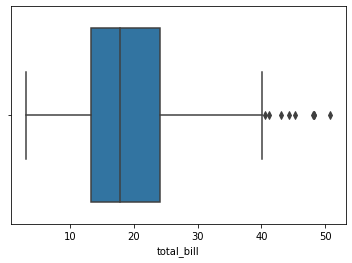

In [16]:
sns.boxplot(data['total_bill'])

In [23]:
from scipy import stats
q1=stats.scoreatpercentile(data['total_bill'],25)
q2=stats.scoreatpercentile(data['total_bill'],50)
q3=stats.scoreatpercentile(data['total_bill'],75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
print('q1--',q1)
print('q2--',q2)
print('q3--',q2)
print('iqr--',iqr)
print('lowerbound--',lb)
print('upperbound--',ub)
outlier_values=data['total_bill'][((data['total_bill']<lb)|(data['total_bill']>ub))]
print(outlier_values)

q1-- 13.3475
q2-- 17.795
q3-- 17.795
iqr-- 10.779999999999998
lowerbound-- -2.8224999999999945
upperbound-- 40.29749999999999
59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64


In [34]:
#hypothesis testing  Ho accepted if 
import numpy as np
#Correlation ------2 numerical data prefer correlation
salary=np.array([100,200,300,400,500])
exp=np.array([3,5,7,9,10])

In [35]:
#pearson
#help(stats.pearsonr)
coeff,pvalue=stats.pearsonr(salary,exp)
print('coeff:',coeff,'pval:',pvalue)
if pvalue<0.05:
    print('Alternate hypothesis: There is a relation')
else:
    print('Null Hypothesis: No relation')
salary1=np.array([-100,200,-300,400,-500])
exp1=np.array([3,5,7,9,10])
coeff1,pvalue1=stats.pearsonr(salary1,exp1)
print('coeff:',coeff1,'pval:',pvalue1)
if pvalue1<0.05:
    print('Alternate hypothesis: There is a relation')
else:
    print('Null Hypothesis: No relation')

coeff: 0.9938837346736188 pval: 0.0005736731093322215
Alternate hypothesis: There is a relation
coeff: -0.1819369266975983 pval: 0.7696351041293764
Null Hypothesis: No relation


In [46]:
#Chi-square test: when two datas are categorical data and you need to find relation btw them use chisquare test
#2categorical data
import pandas as pd
data1=pd.crosstab(data['sex'],data['time'])  #used to find numerical values btw 2 categorical data
print(data1)
print(data1.values)
coeff,pval,dof,exp=stats.chi2_contingency(data1.values)
print('chisquare:',coeff,'pval:',pval,'dof:',dof,'exp:',exp)
if pval<0.05:
    print('alt_hypothesis:relation')
else:
    print('Null_hypothesis:No relation')

time    Lunch  Dinner
sex                  
Male       33     124
Female     35      52
[[ 33 124]
 [ 35  52]]
chisquare: 9.343808982970623 pval: 0.002237400118075248 dof: 1 exp: [[ 43.75409836 113.24590164]
 [ 24.24590164  62.75409836]]
alt_hypothesis:relation
